In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mouse_viral_study.csv')
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


<Axes: xlabel='Med_1_mL', ylabel='Med_2_mL'>

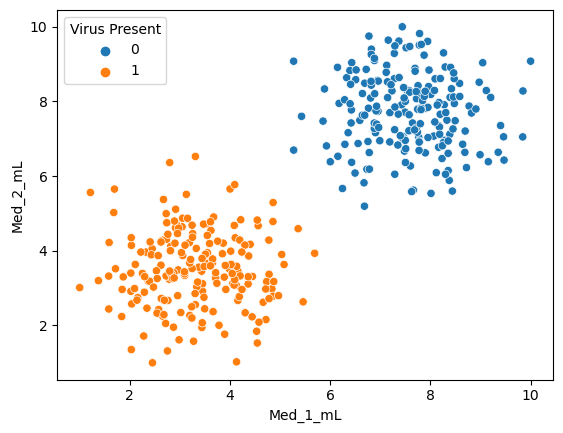

In [3]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',data=df)

In [4]:
from sklearn.svm import SVC 

In [5]:
X = df.drop('Virus Present',axis=1)
y=df['Virus Present']

In [6]:
#help(SVC)

In [42]:
model = SVC(kernel='linear',C=.01)
model.fit(X,y)

SVC(C=0.01, kernel='linear')

In [43]:
from svm_margin_plot import plot_svm_boundary

/Users/shrey/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


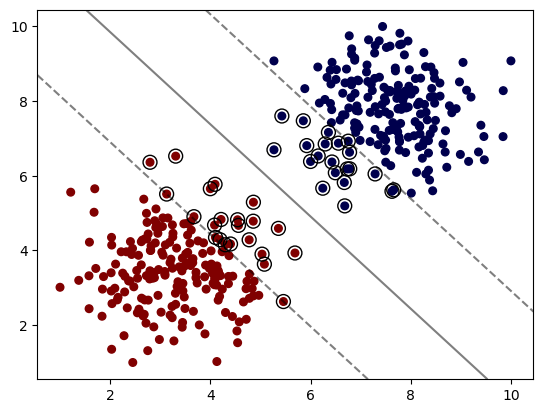

In [44]:
plot_svm_boundary(model,X,y)

/Users/shrey/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


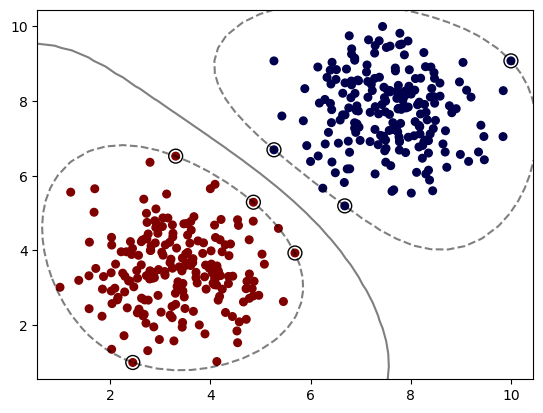

In [19]:
model_rbf = SVC(kernel='rbf',C=100000000)
model_rbf.fit(X,y)
plot_svm_boundary(model_rbf,X,y)

/Users/shrey/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


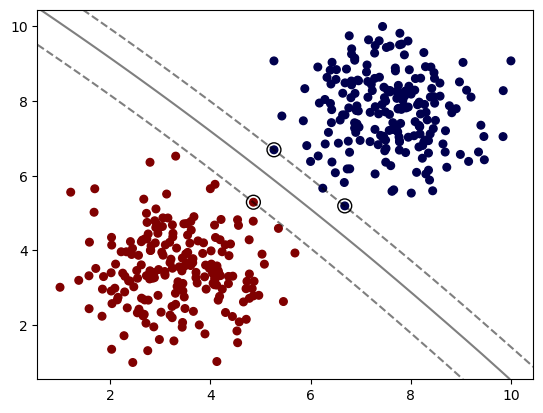

In [26]:
model_poly = SVC(kernel='poly',C=1 , degree=4)
model_poly.fit(X,y)
plot_svm_boundary(model_poly,X,y)

/Users/shrey/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


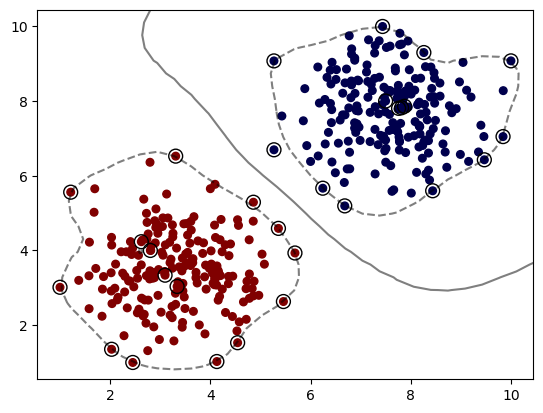

In [34]:
model_rbf = SVC(kernel='rbf',C=1,gamma=0.4)
model_rbf.fit(X,y)
plot_svm_boundary(model_rbf,X,y)

### Grid Search with CV

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf']}
grid = GridSearchCV(svm,param_grid)
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [40]:
grid.best_score_

1.0

In [41]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}